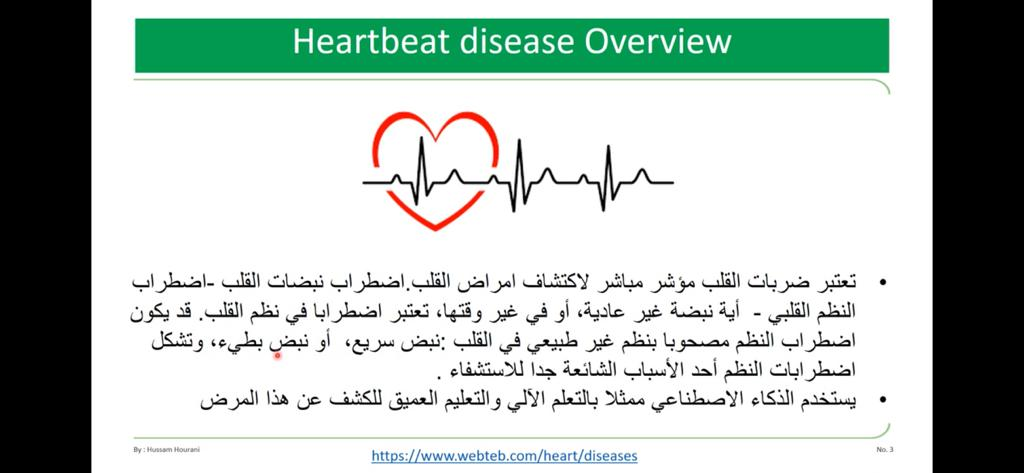

# Project: Heartbeat disease classifier

**Dataset link**
https://www.kaggle.com/kinguistics/heartbeat-sounds

**Dataset name**
Heartbeat Sounds
Classifying heartbeat anomalies from stethoscope audio

**dataset**
-set a
-set b

**dataset devides into labels :**
label: murmur 
label: normal 
label: artifact 
label: extrahls 
label: extrastole
Heartbeat Disease Classifier

In [ ]:
import pandas as pd
# Scikit learn
from sklearn.model selection import train test_ split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.preprocessing import LabelEncoder 
from sklearn.utils import shuffle 
from sklearn.utils import class_weight
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D 
from keras.utils import to_categorical
# Audio
import librosa import librosa.display
# PLot
import matplotlib.pyplot as plt
# Utility
import os 
import glob
import numpy as np 
from tqdm import tqdm 
import itertools


dataset = []
for folder in ["dataset/set_a/*", "dataset/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename (filename).split("_")[0]
            # skip audio smaller than 4 secs
            if librosa.get_duration(filename=filename)›=4:
                if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                    dataset.append({"filename": filename, "label": label})

dataset = pd. DataFrame (dataset)
dataset = shuffle (dataset, random_state=42)
print (dataset.info())

plt.figure(figsize= (12,6))
dataset.label.value_counts().plot(kind='bar', title="Dataset distribution") 
plt.show()
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
print("Train: %i" % len (train))
print("Test: %i" % len(test))


plt.figure(figsize=(20,20))
idx = 0
for label in dataset.label.unique () :
    print ("label: ", label)
    У, sr = librosa.load (dataset [dataset.label==label].filename.iloc [0], duration=4) 
    idx+=1
    plt.subplot(5, 3, idx) 
    plt.title("% wave" % label) 
    librosa.display.waveplot (y, sr=sr) 
    idx+=1
    pit.subplot (5, 3, idx)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=p.max)
    librosa.display.specshow(D, y_axis='linear') 
    plt.title("% spectogram" % label) idx+=1
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    plt.subplot (5, 3, idx)
    librosa.display.specshow(mfccs, ×_axis='time') 
    plt.title("% mfcc" % label)
plt.show()
#shows labels / label: murmur label: normal label: artifact label: extrahls label: extrastole



def extract_features(audio_path):
    y, sr = librosa.load(audio_path, duration=4)
    mfccs = librosa.feature.mfcc (y=y, sr=sr, n_mfcc=40)
    return mfccs
X_train, X_test = [], []
print("Extract features from TRAIN and TEST dataset")
for idx in tqdm(range (len (train))):
    X_train.append(extract_features(train.filename.iloc[idx]))
for idx in tqdm(range(len (test))):
    x_test.append(extract_features (test.filename.iloc[idx]))
x_test = np.asarray (x_test)
× _train = np.asarray(x_train)
print("X train:", x_train.shape)
print("X test:", x_test.shape)
encoder = LabelEncoder
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y test = encoder.transform(test.label)
class_weights = class_weight. compute_class_weight ('balanced', np.unique (y_train), y_ train)
×_train = x_train. reshape(×_train.shape[0], ×_train.shape[1], ×_train.shape[2], 1)
×_test = ×_test. reshape (x_test.shape[0], ×_test.shape[1], ×_test.shape [2], 1)
y_train = to_categorical (y_train)
y_test = to_categorical (y_test)
print("X train:", ×_train.shape)
print("y train:", y_train.shape)
print()
print("X test:", x_test.shape)
print("y test:", y_test.shape)


model = Sequential ()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(×_train.shape [1],×_train. shape [2],x_train.shape [3]), activation='relu'))
model.add(MaxPooling2D (pool_size=2))
model.add(Dropout (0.2))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu')) model. add(MaxPooling2D (pool_size=2)) model. add(Dropout (0.2))
model.add(Conv2D (filters=64, kernel_size=2, activation='relu')) model.add(MaxPooling2D (pool_size=2)) model.add(Dropout (0.2))
model.add(Conv2D(filters=128, kernel_size=2, activation='relu')) model.add(MaxPooling2D (pool_size=2)) model.add(Dropout (0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense (len (encoder. classes_), activation='softmax')) 
model.summary ()


model.compile (loss='categorical _crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(x_train, y_train, batch_size=128, epochs=300, validation data=(x test, y_test), class_weight=class_weights, shuffle=True)

# Loss Curves
plt.figure(figsize= [14, 10]) pit.subplot (211)
plt.plot (history.history['loss '], 'r', linewidth=3.0) 
plt.plot(history.history['val_loss'], 'b', linewidth=3.0) 
plt. legend (['Training loss', 'Validation Loss'], fontsize=18) 
plt.xlabel('Epochs ', fontsize=16; plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
# Accuracy Curves
plt.figure(figsize= [14, 10]) plt.subplot(212)
plt.plot(history.history['accuracy'], 'r', linewidth=3.0) 
plt.plot (history.history['val_accuracy'], 'b', linewidth=3.0) 
plt. legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18) 
plt.xlabel('Epochs ', fontsize=16) 
plt.ylabel ('Accuracy', fontsize=16) 
plt.title ('Accuracy Curves', fontsize=16)

# Save model and weights
model_name = "heartbeat_disease.h5"
model. save (model_name)
print ('Saved trained model at % ' % model_name)
scores = model.evaluate (x_test, _test, verbose=1)
print('Test loss:', scores [0])
print('Test accuracy:', scores [1])
predictions = model.predict (_test, verbose=1)
y_true, Y_pred = [J, [J
classes = encoder. classes_
for idx, prediction in enumerate (predictions):
    y_true.append(classes [np.argmax(y_test[id×])])
    y_pred.append(classes [np.argmax(prediction)])
print(classification_report(y_pred, _true))



def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
'''This function prints and plots the confusion matrix.
Normalization can be applied by setting 'normalize=True'.
'''
    plt.figure(figsize=(11, 11))
    pit. imshow (cm, interpolation='nearest', cmap=cap) 
    plt. title(title, fontsize=30)
    tick_marks = p.arange(len (classes))
    plt.xticks(tick_magks, classes, rotation=90, fontsize=15) 
    plt.yticks(tick_marks, classes, fontsize=15)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product (range(cm. shape [0]), range (cm. shape [1])):
        plt.text(j, i, format (cm[i, j], fmt), horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel ('True label', fontsize=25) 
    plt.xlabel ('Predicted label', fontsize=25) 
    plt.tight layout () 
    plt.show()


cnf_matrix = confusion_matrix(y_pred, y_true)
cnf_matrix = cnf_matrix.astype(float) / cf_matrix.sum(axis=1) [:, np.newaxis]
plot_confusion_matrix(cnf_matrix, classes)

# Refrences

https://www.kaggle.com/paoloripamonti/heartbeat-disease-classifier
